In [1]:
from freecond_src.freecond_utils import get_pipeline_forward
from freecond_src.freecond import fc_config
from diffusers import DDIMScheduler
from PIL import Image

pipeline, forward = get_pipeline_forward(method="sd",variant="sd15")
# pipeline, forward = get_pipeline_forward(method="cn")
# Other scheduler should be fine, but this is used during the experiment
pipeline.scheduler=DDIMScheduler.from_config(pipeline.scheduler.config) 


❗❗❗ Be sure using correct python environment, the python environment are different for methods 
🔄 Building Stable-Diffusion-Inpainting FreeCond control...
# Load backbone model
## Load backbone model = Stable Diffusion Inpainting 1.5


safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/nfs/home/bluedyee/miniconda3/envs/hdpainter/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/nfs/home/bluedyee/miniconda3/envs/hdpainter/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
An error occurred while trying to fetch /nfs/home/bluedyee/.cache/huggingface/hub/models--sd-legacy--stable-diffusion-inpainting/snapshots/8a4288a76071

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

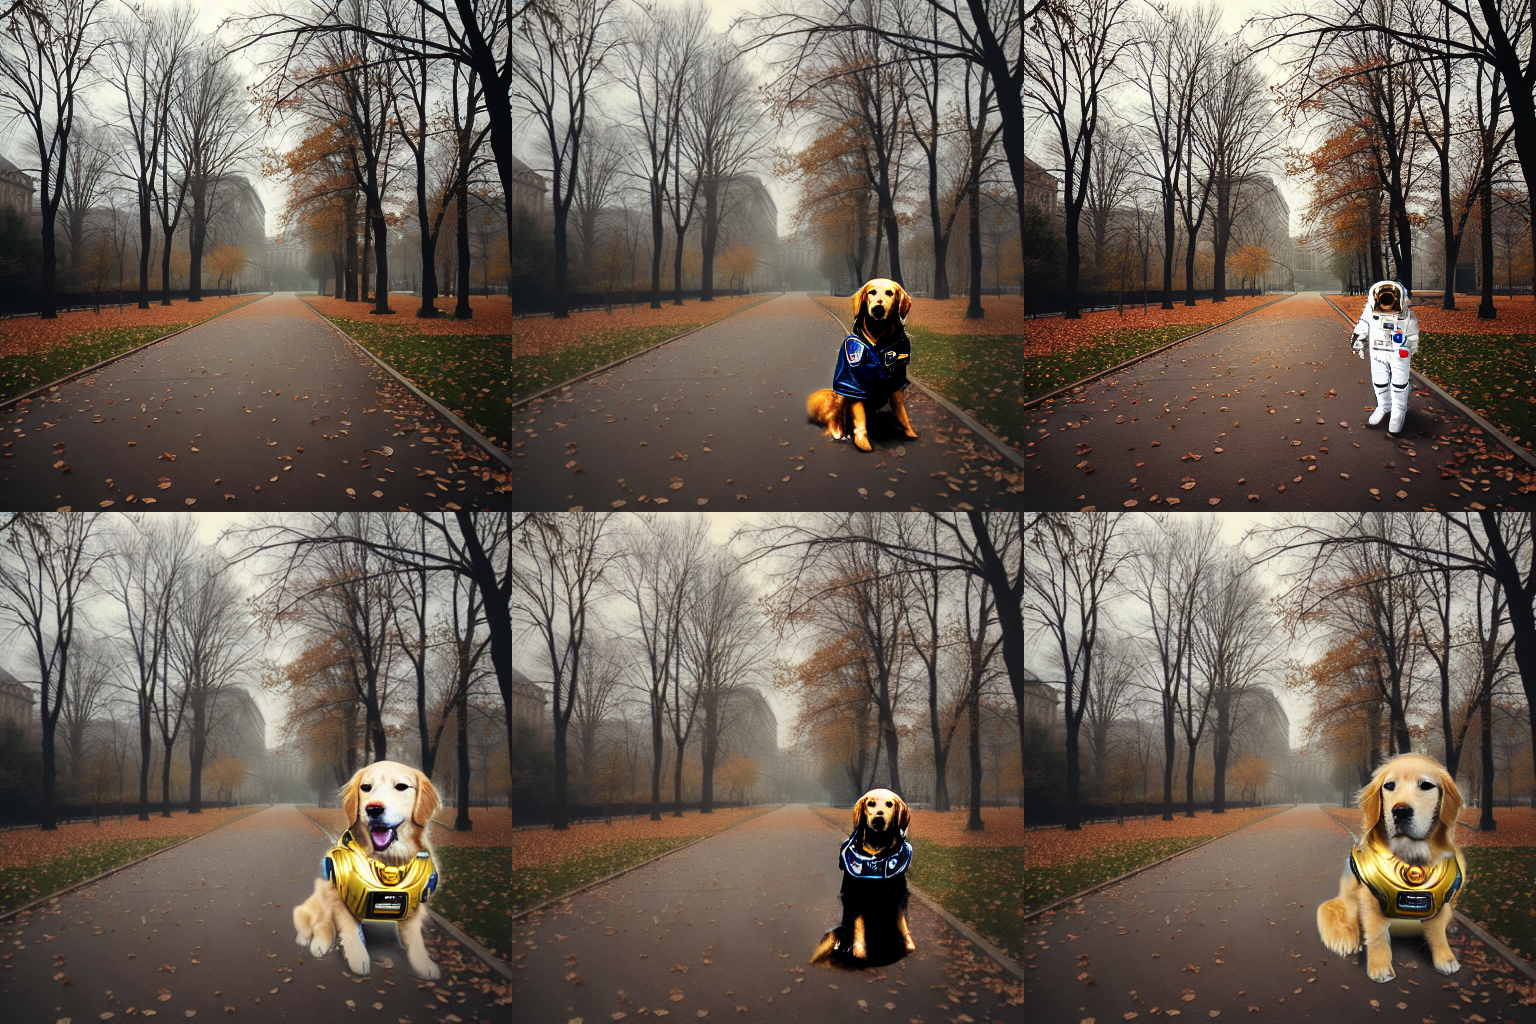

In [4]:
from diffusers.utils import make_image_grid
import torch
# ❗ The demonstration output aren't identical the reported images in our research paper.
# Because we delete some unnecessary operation during revision, leading to the change of effect about random seed.

mask=Image.open("./demo_data/mask_1_2.png").convert("L").resize((512,512))
init_image=Image.open("./demo_data/img_1_2.jpg").convert("RGB").resize((512,512))
prompt="A golden retriever wearing astronaut gear, in cyberpunk style"
nprompt="word, bad quality, bad anatomy, ugly, mutation, blurry, error"

# Default to SDI
fc_control=fc_config(change_step=0,fg_1=1,fg_2=1,bg_1=0,bg_2=0,hq_1=1,hq_2=1,lq_1=1,lq_2=1,fq_th=32)
# Setting FreeCond control for SDI15
torch.manual_seed(777)
default_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)

fc_images=[]

# FreeCond control for SDI 15, change alpha scale
fc_control=fc_config(change_step=0,fg_1=1,fg_2=3,bg_1=0,bg_2=0,hq_1=1,hq_2=1,lq_1=1,lq_2=1,fq_th=32)
torch.manual_seed(777)
fc_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)
fc_images.append(fc_out[0])

# FreeCond control for SDI 15, change beta scale
fc_control=fc_config(change_step=0,fg_1=1,fg_2=1,bg_1=0,bg_2=0.5,hq_1=1,hq_2=1,lq_1=1,lq_2=1,fq_th=4)
fc_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)
fc_images.append(fc_out[0])

# Setting FreeCond control for SDI, change freq
torch.manual_seed(777)
fc_control=fc_config(change_step=25,fg_1=1,fg_2=1,bg_1=0,bg_2=0, hq_1=0,hq_2=1,lq_1=1,lq_2=1,fq_th=24)
fc_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)
fc_images.append(fc_out[0])


# Setting FreeCond control for SDI, hybird
torch.manual_seed(777)
fc_control=fc_config(change_step=25,fg_1=3,fg_2=3,bg_1=0.3,bg_2=0.3, hq_1=0,hq_2=1,lq_1=1,lq_2=1,fq_th=24)
fc_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)
fc_images.append(fc_out[0])

# Setting FreeCond control for SDI, hybrid with stage
torch.manual_seed(777)
fc_control=fc_config(change_step=25,fg_1=1,fg_2=1.5,bg_1=0.2,bg_2=0.2, hq_1=0,hq_2=1,lq_1=1,lq_2=1,fq_th=24)
fc_out = forward(fc_control,init_image=init_image,mask_image=mask,prompt=prompt,negative_prompt=nprompt)
fc_images.append(fc_out[0])

make_image_grid([default_out[0]]+fc_images,rows=2,cols=3)